## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
research_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
research_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
research_df['Mouse ID'].nunique()

249

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID_TMP = research_df[research_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_ID_TMP

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouseID = research_df.loc[research_df['Mouse ID'] == 'g989']
duplicate_mouseID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanresearch_df = research_df.loc[research_df['Mouse ID'] != 'g989']
cleanresearch_df.shape

(1880, 8)

In [6]:
# Check the number of mice in the clean DataFrame.
cleanresearch_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimengroup = cleanresearch_df.groupby('Drug Regimen')

tumorV_mean = regimengroup['Tumor Volume (mm3)'].mean()

tumorV_median = regimengroup['Tumor Volume (mm3)'].median()

tumorV_var = regimengroup['Tumor Volume (mm3)'].var()

tumorV_sd = regimengroup['Tumor Volume (mm3)'].std()

tumorV_sem = regimengroup['Tumor Volume (mm3)'].sem()

summary_statistic = pd.DataFrame({'Mean':tumorV_mean,
                                 'Median': tumorV_median,
                                 'Variance': tumorV_var,
                                 'Standard Deviation': tumorV_sd,
                                 'SEM': tumorV_sem})
summary_statistic

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)
regimengroup.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

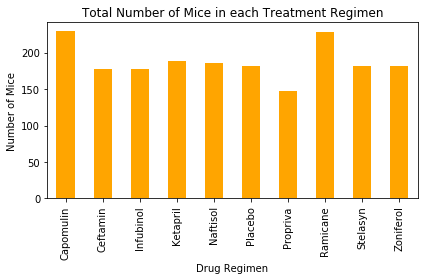

In [9]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 
## Note: this plot will be identical to the one that uses Pyplot

micecount_regimen = regimengroup['Drug Regimen'].count()
regimen_micetotal = micecount_regimen.plot(kind='bar', title='Total Number of Mice in each Treatment Regimen', color='orange')
regimen_micetotal.set_ylabel('Number of Mice')
plt.tight_layout()
plt.show()

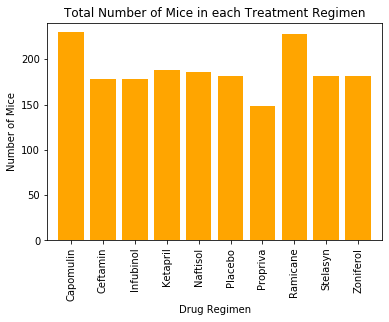

In [10]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.
##  Note: this plot will be identical to the one that uses Pandas

x = np.arange(len(micecount_regimen))
tick_locations = [value for value in x]

plt.xticks(tick_locations, micecount_regimen.index, rotation='vertical')

plt.bar(micecount_regimen.index, micecount_regimen, color='orange')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Total Number of Mice in each Treatment Regimen')

plt.xlim(-0.75, len(micecount_regimen.index)-0.25)
plt.ylim(0, max(micecount_regimen)+10)
plt.show()

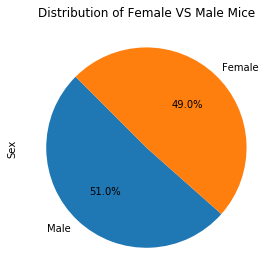

In [11]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
## Note: this plot will be identical to the one that uses Pyplot
sex_count = cleanresearch_df['Sex'].value_counts()
sex_micetotal = sex_count.plot(kind='pie', title='Distribution of Female VS Male Mice',autopct="%1.1f%%", startangle=135)
plt.tight_layout()
plt.show()

C:\Users\ckuna\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


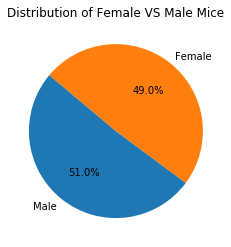

In [12]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice
##  Note: this plot will be identical to the one that uses Pandas

male = cleanresearch_df.loc[cleanresearch_df['Sex'] == 'Male', ['Sex']].count()
female = cleanresearch_df.loc[cleanresearch_df['Sex'] == 'Female', ['Sex']].count()
sex = [male, female]
chartlabels = cleanresearch_df['Sex'].unique()

# sizes = 

plt.pie(sex, labels=chartlabels, autopct="%1.1f%%", startangle=140)
plt.title('Distribution of Female VS Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (latest) timepoint for each mouse
drugNames = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drugReg_df = cleanresearch_df.loc[cleanresearch_df['Drug Regimen'].isin(drugNames)]

timepoint_df = drugReg_df.groupby('Mouse ID')['Timepoint'].max()

IDtimepoint_df = timepoint_df.reset_index()


In [14]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_regimen_df = pd.merge(IDtimepoint_df, drugReg_df, on=['Mouse ID', 'Timepoint'])
timepoint_regimen_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [15]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumorVol_drug = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugNames:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drugtumorvolume = timepoint_regimen_df.loc[timepoint_regimen_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
                                           
    # add subset 
    tumorVol_drug.append(drugtumorvolume)
    
    # Determine outliers using upper and lower bounds
    quartiles = drugtumorvolume.quantile([.25,.5,.75])

    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    median = quartiles[0.5]
    
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = drugtumorvolume.loc[(drugtumorvolume < lower_bound) | (drugtumorvolume > upper_bound)]
    
    print(f"{drug}, median: {round(median,2)}. Outliers (values): {len(outliers)} ({outliers})")

Capomulin, median: 38.13. Outliers (values): 0 (Series([], Name: Tumor Volume (mm3), dtype: float64))
Ramicane, median: 36.56. Outliers (values): 0 (Series([], Name: Tumor Volume (mm3), dtype: float64))
Infubinol, median: 60.17. Outliers (values): 1 (15    36.321346
Name: Tumor Volume (mm3), dtype: float64)
Ceftamin, median: 59.85. Outliers (values): 0 (Series([], Name: Tumor Volume (mm3), dtype: float64))


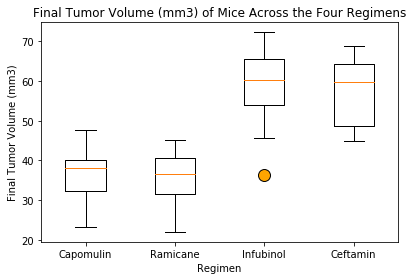

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='orange',markersize=12)
plt.boxplot(tumorVol_drug, labels = drugNames,flierprops=orange_out)

## FEEDBACK FROM GRADER: In the box plot, the outlier should have a custom style or color
plt.title('Final Tumor Volume (mm3) of Mice Across the Four Regimens')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Regimen')

plt.tight_layout()
plt.show()

## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
capumulin_df = drugReg_df.loc[drugReg_df['Drug Regimen'] == 'Capomulin']
                               
capumulin_b128 = capumulin_df.loc[(capumulin_df['Mouse ID'] == 'b128'), :]

capumulin_b128

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


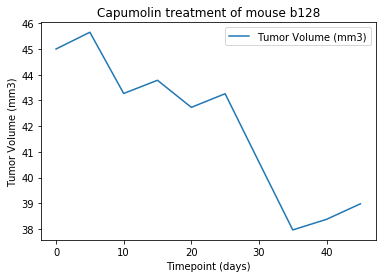

In [18]:
tumorVolTimept_df = capumulin_b128[['Tumor Volume (mm3)','Timepoint']]
tumorVolTimept_df.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)')
plt.title('Capumolin treatment of mouse b128')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.show()

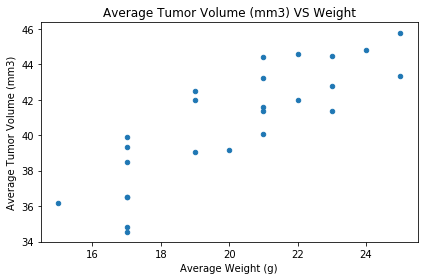

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
mouseID_wtgroup = capumulin_df.groupby('Mouse ID')
capumolin_avg_wt_tumorV = mouseID_wtgroup[['Weight (g)','Tumor Volume (mm3)']].mean()

capumolin_avg_wt_tumorV_df = capumolin_avg_wt_tumorV.reset_index()

capumolin_avg_wt_tumorV_df = capumolin_avg_wt_tumorV_df.rename(columns={"Weight (g)": "Average Weight (g)",
                                 "Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})

capumolin_avg_wt_tumorV_df.plot(kind='scatter', x='Average Weight (g)', y='Average Tumor Volume (mm3)', 
                                 title='Average Tumor Volume (mm3) VS Weight')

plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation coefficient is: 0.8419363424694718.
The r-squared is: 0.7088568047708717


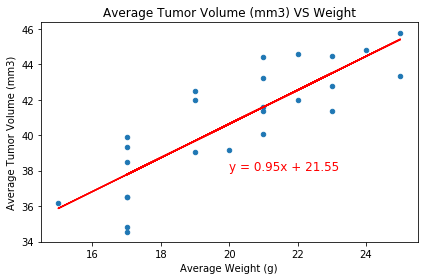

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.

x = capumolin_avg_wt_tumorV_df['Average Weight (g)']
y = capumolin_avg_wt_tumorV_df['Average Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

capumolin_avg_wt_tumorV_df.plot(kind='scatter', x='Average Weight (g)', y='Average Tumor Volume (mm3)', 
                                 title='Average Tumor Volume (mm3) VS Weight')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=12,color="red")

print(f"The correlation coefficient is: {rvalue}.")
print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.show()

# Three Observations:

1. There's a strong relation between the average tumor volume and the averagew weight: Tumor volume of a mouse tends to increase with the increase in weight.
2. Ramicane (median of 36.56 mm3) and Capomulin (median of 38.13 mm3) seem to be the most effective drugs in inhibiting tumor out of the four promising drugs. Though, both drugs do have more subjects compared to other drugs.
3. The are no outliers -with an except of 1 outlier for Infubinol- across the four promising drugs (Capomulin, Ramicane, Infubinol, and Ceftamin).